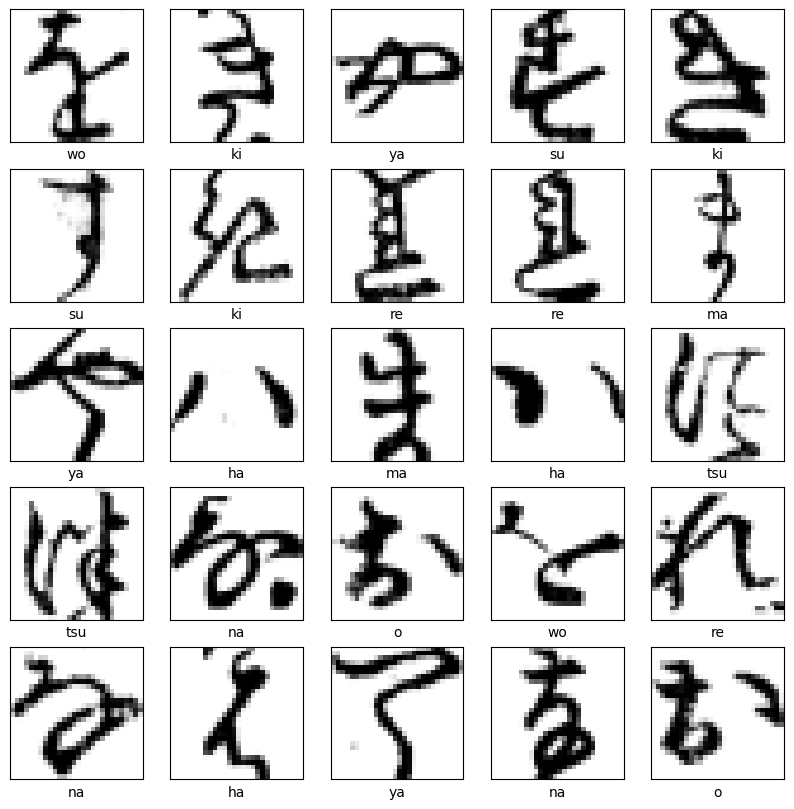

Epoch 1/3


C:\Users\MedNo\OneDrive\Escritorio\Carrera\Procesamiento de Datos\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7849 - loss: 0.6738
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.9293 - loss: 0.2294
Epoch 3/3
1503/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.9493 - loss: 0.1667


KeyboardInterrupt



In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
import tensorflow as tf
import tensorflow_datasets as tfds

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

dataset, metadata = tfds.load('kmnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = metadata.features['label'].names

num_train_examples = metadata.splits['train'].num_examples 
num_test_examples = metadata.splits['test'].num_examples 

def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

for images, labels in train_dataset.take(1):
  break
images = images.numpy().reshape((28,28))

plt.figure(figsize=(10,10))
for i,(images, labels) in enumerate(train_dataset.take(25)):
  images = images.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images, cmap = plt.cm.binary)
  plt.xlabel(class_names[labels])
plt.show()

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), 
  tf.keras.layers.Dense(72, activation=tf.nn.relu), 
  tf.keras.layers.Dense(72, activation=tf.nn.relu), 
  tf.keras.layers.Dense(72, activation=tf.nn.relu), 
  tf.keras.layers.Dense(72, activation=tf.nn.relu), 
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

model.fit(
  train_dataset, epochs=3,
  steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE)
)

test_loss, test_accuracy = model.evaluate(
  test_dataset, steps=math.ceil(num_test_examples/32)
)
print("Resultado en las pruebas: ", test_accuracy)

for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
  
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#888888")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  